In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import magic_launcher as magic
from sklearn import linear_model
from pprint import pprint as pretty

In [2]:
dataset = magic.getDataset()

In [3]:
dataset = magic.explode(dataset, 'color', '')
dataset = magic.explode(dataset, 'type', ' ')
dataset.head()

,name,color,cmc,type,subtype,set,rarity,text,power,toughness,price_usd,price_eur,price_usd_foil,year
0,Fury Sliver,R,6,Creature,Sliver,tsp,uncommon,All Sliver creatures have double strike.,3,3,1.01,0.08,2.00,2006
1,Kor Outfitter,W,2,Creature,Kor Soldier,zen,common,"When Kor Outfitter enters the battlefield, you...",2,2,0.28,0.14,0.50,2009
2,Siren Lookout,U,3,Creature,Siren Pirate,xln,common,Flying When Siren Lookout enters the battlefi...,1,2,0.08,0.03,0.21,2017
3,Web,G,1,Enchantment,Aura,3ed,rare,Enchant creature (Target a creature as you cas...,<NA>,<NA>,0.63,0.99,NaN,1994
4,Venerable Knight,W,1,Creature,Human Knight,eld,uncommon,"When Venerable Knight dies, put a +1/+1 counte...",2,1,0.11,0.04,0.30,2019


In [4]:
x = 'color'
y = 'type'

cont = dataset[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")

In [5]:
tx = cont.loc[:,['Total']]
ty = cont.loc[['Total'],:]
n = len(dataset)
indep = tx.dot(ty) / n

In [6]:
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

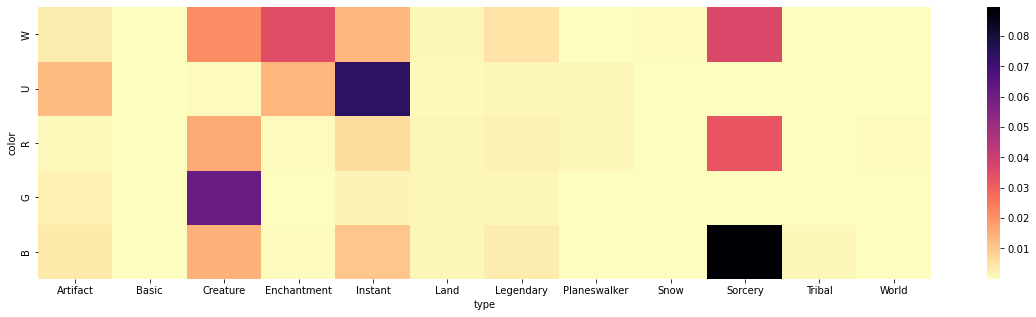

In [7]:
fig_dims = (20,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(table.iloc[:-1,:-1], cmap='magma_r').invert_yaxis()
plt.show()